colonne pas utilisé pour le moment : 'destination_IP_address', 'source_IP_address' start_time

In [1]:
import pandas as pd
import numpy as np

df_clean = pd.read_csv("D:/School/cours_5eme/projet/database/Kyoto2016/2015/02/csv_concatenate/concatenate_database_8.csv", sep = ",")

In [2]:
df_clean['malware_detection'].groupby(0).count()

ValueError: Grouper for '<class 'numpy.int64'>' not 1-dimensional

In [ ]:
df_clean.loc[df_clean['malware_detection'] != 0] = 1

In [ ]:
df_clean = df_clean.astype(int)

In [5]:
num_z = len(df_clean[df_clean["malware_detection"] == 0])
num_total = len(df_clean["malware_detection"])
print(num_z/num_total)

0.9986212580482139


In [6]:
len(df_clean["malware_detection"])

1951054

# algo

In [7]:
X = df_clean.drop(['malware_detection'], axis = 1)
y = df_clean[['malware_detection']]

In [8]:
X=X.values.reshape((X.values.shape[0], X.values.shape[1], 1))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
X_train.shape

(1560843, 23, 1)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU

import numpy as np

# Question 1
# instantiate the model, add hidden and output layers
model=Sequential()

model.add(LSTM(64, input_shape=(23,1), return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Question 2
# compile and summarize the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


# train the model 
h = model.fit(X_train, y_train,validation_data = (X_test, y_test), epochs=5)

Epoch 1/5
48777/48777 [==============================] - 443s 9ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 4.5361e-04 - val_accuracy: 0.9998
Epoch 2/5
48777/48777 [==============================] - 437s 9ms/step - loss: 3.8423e-04 - accuracy: 0.9998 - val_loss: 3.0712e-04 - val_accuracy: 0.9999
Epoch 3/5
48777/48777 [==============================] - 409s 8ms/step - loss: 2.8390e-04 - accuracy: 0.9999 - val_loss: 2.5614e-04 - val_accuracy: 0.9999
Epoch 4/5
48777/48777 [==============================] - 430s 9ms/step - loss: 2.3669e-04 - accuracy: 0.9999 - val_loss: 2.2900e-04 - val_accuracy: 0.9999
Epoch 5/5
48777/48777 [==============================] - 491s 10ms/step - loss: 2.0760e-04 - accuracy: 0.9999 - val_loss: 2.1131e-04 - val_accuracy: 0.9999


In [12]:
# Question 4
# evaluate the model accuracy on test data
print(model.evaluate(X_test, y_test, verbose=0))
print(y_test)

[0.0002113120281137526, 0.9999249577522278]
         malware_detection
728434                   0
1826507                  0
205540                   0
168328                   0
1281653                  0
...                    ...
1190702                  0
330420                   0
1909641                  0
1212037                  0
138273                   0

[390211 rows x 1 columns]


In [13]:
print('model accuracy on test data: ', np.round(model.evaluate(X_test, y_test, verbose=0)[1],4))
print(y_test)

model accuracy on test data:  0.9999
         malware_detection
728434                   0
1826507                  0
205540                   0
168328                   0
1281653                  0
...                    ...
1190702                  0
330420                   0
1909641                  0
1212037                  0
138273                   0

[390211 rows x 1 columns]


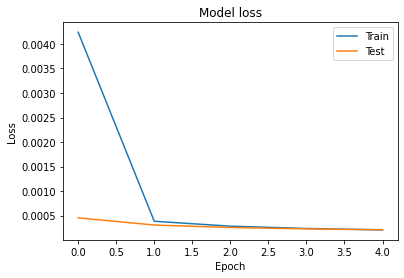

In [14]:
import matplotlib.pyplot as plt
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

# Question 7
# plot train and test losses
plot_loss(h.history['loss'], h.history['val_loss'])

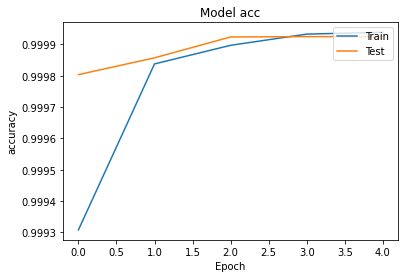

In [15]:
def plot_acc(acc,val_acc):
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model acc')
  plt.ylabel('accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

# Question 7
# plot train and test losses
plot_acc(h.history['accuracy'], h.history['val_accuracy'])

In [16]:
df_predict = pd.read_csv("D:/School/cours_5eme/projet/database/Kyoto2016/2015/01/csv_concatenate/concatenate_database_8.csv", sep = ",")
df_predict

,Unnamed: 0,duration_connection,service,source_bytes,destination_bytes,count,same_srv_rate,serror_rate,srv_serror_rate,dst_host_count,...,flag,IDS_detection,malware_detection,ashula_detection,label,source_IP_address,source_port_number,destination_IP_address,destination_port_number,duration
0,0,0.000000,2,0,0,0,0.0,0.0,0.00,0,...,6,0,0,0,-1,15539,47904,624,23,1
1,1,0.000000,2,0,0,0,0.0,0.0,0.00,0,...,6,0,0,0,-1,15539,58974,406,23,1
2,2,0.000000,2,0,0,0,0.0,0.0,0.00,0,...,6,0,0,0,-1,15539,37174,732,23,1
3,3,0.000000,2,0,0,0,0.0,0.0,0.00,0,...,6,0,0,0,-1,5865,40711,641,3389,1
4,4,0.000052,2,0,0,0,0.0,0.0,0.00,0,...,10,3,0,0,-1,3875,8429,566,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723587,305859,0.000000,3,0,0,0,0.0,0.0,0.75,0,...,6,0,0,0,-1,16162,39232,664,80,1
3723588,305860,0.000000,3,0,0,0,0.0,0.0,0.75,0,...,6,0,0,0,-1,16989,4355,311,80,1
3723589,305861,2.983283,3,0,0,0,0.0,0.0,1.00,52,...,6,0,0,0,-1,3198,1357,27,445,1
3723590,305862,0.000000,3,0,0,0,0.0,0.0,1.00,0,...,6,0,0,0,-1,2890,42278,1150,3128,1


In [17]:
# df_predict.loc[df_clean['malware_detection'] != 0] = 1

X_predict = df_predict.drop(['malware_detection'], axis = 1)

y_predict = df_predict[['malware_detection']]

In [18]:
from sklearn.metrics import confusion_matrix
predictions=model.predict(X_predict)
cm = confusion_matrix(y_true=y_predict, y_pred=predictions)
cm

ValueError: in user code:

    C:\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Python38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:176 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 23]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)
cm